# 数据可视化作业题目

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [4]:
data = sns.load_dataset("flights")
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
data['month']=data['month'].map(month_mapping)

using matplotlib

Text(0.5, 1.0, 'The number of passengers in each month')

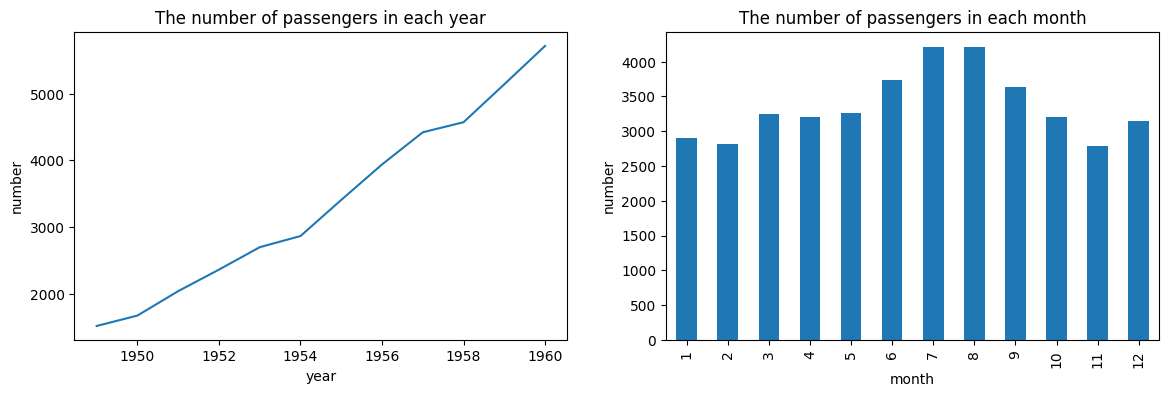

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
axs[0].plot(data.groupby('year')['passengers'].sum())
axs[0].set_xlabel('year')
axs[0].set_ylabel('number')
axs[0].set_title('The number of passengers in each year')
data.groupby('month')['passengers'].sum().plot.bar(ax=axs[1])
axs[1].set_xlabel('month')
axs[1].set_ylabel('number')
axs[1].set_title('The number of passengers in each month')

using seaborn

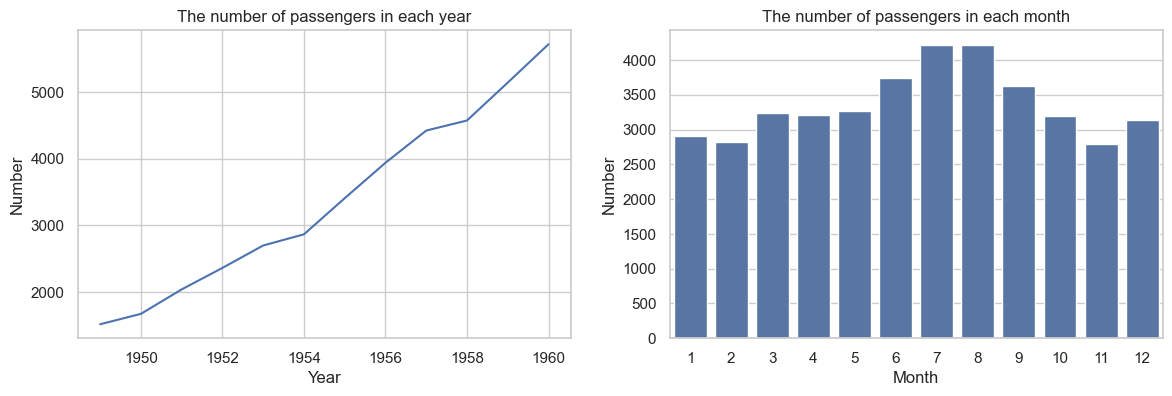

In [6]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
sns.lineplot(x='year', y='passengers', data=data.groupby('year')['passengers'].sum().reset_index(), ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number')
axs[0].set_title('The number of passengers in each year')
sns.barplot(x='month', y='passengers', data=data.groupby('month')['passengers'].sum().reset_index(), ax=axs[1])
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number')
axs[1].set_title('The number of passengers in each month')
plt.show()

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [8]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1. 萼片（sepal）和花瓣（petal）的大小关系

using matplotlib

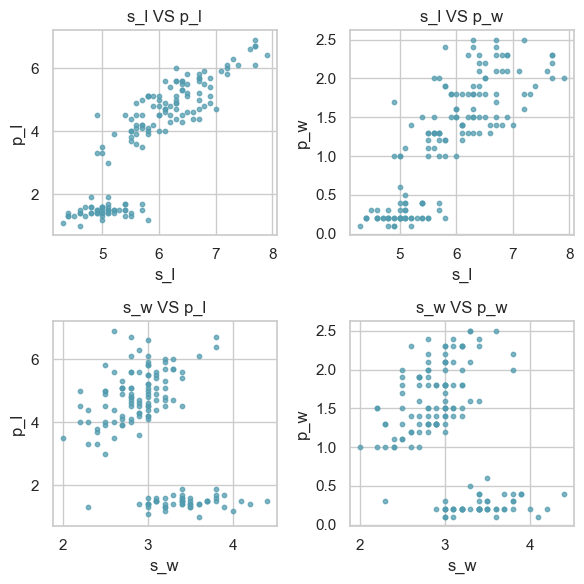

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

axs[0, 0].scatter(data['sepal_length'], data['petal_length'], s = 10, color = '#539caf', alpha = 0.75)
axs[0, 0].set_xlabel('s_l')
axs[0, 0].set_ylabel('p_l')
axs[0, 0].set_title('s_l VS p_l')

axs[0, 1].scatter(data['sepal_length'], data['petal_width'], s = 10, color = '#539caf', alpha = 0.75)
axs[0, 1].set_xlabel('s_l')
axs[0, 1].set_ylabel('p_w')
axs[0, 1].set_title('s_l VS p_w')

axs[1, 0].scatter(data['sepal_width'], data['petal_length'], s = 10, color = '#539caf', alpha = 0.75)
axs[1, 0].set_xlabel('s_w')
axs[1, 0].set_ylabel('p_l')
axs[1, 0].set_title('s_w VS p_l')

axs[1, 1].scatter(data['sepal_width'], data['petal_width'], s = 10, color = '#539caf', alpha = 0.75)
axs[1, 1].set_xlabel('s_w')
axs[1, 1].set_ylabel('p_w')
axs[1, 1].set_title('s_w VS p_w')

plt.tight_layout()

plt.show()

using seaborn

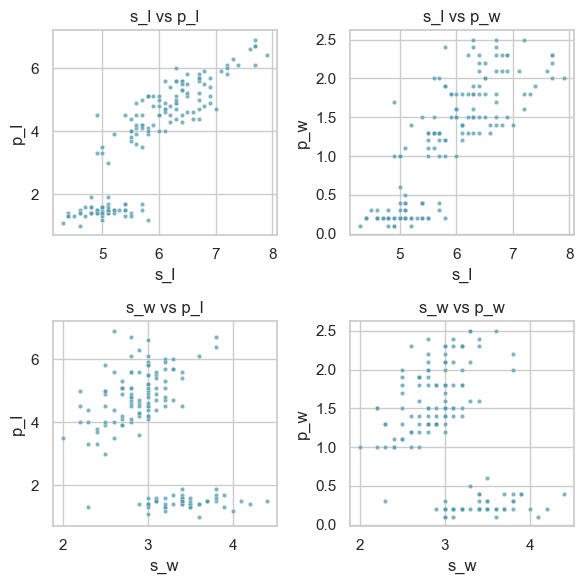

In [14]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(6, 6))

sns.scatterplot(x='sepal_length', y='petal_length', data=data, s=10, color='#539caf', alpha=0.75, ax=axs[0, 0])
axs[0, 0].set_xlabel('s_l')
axs[0, 0].set_ylabel('p_l')
axs[0, 0].set_title('s_l vs p_l')

sns.scatterplot(x='sepal_length', y='petal_width', data=data, s=10, color='#539caf', alpha=0.75, ax=axs[0, 1])
axs[0, 1].set_xlabel('s_l')
axs[0, 1].set_ylabel('p_w')
axs[0, 1].set_title('s_l vs p_w')

sns.scatterplot(x='sepal_width', y='petal_length', data=data, s=10, color='#539caf', alpha=0.75, ax=axs[1, 0])
axs[1, 0].set_xlabel('s_w')
axs[1, 0].set_ylabel('p_l')
axs[1, 0].set_title('s_w vs p_l')

sns.scatterplot(x='sepal_width', y='petal_width', data=data, s=10, color='#539caf', alpha=0.75, ax=axs[1, 1])
axs[1, 1].set_xlabel('s_w')
axs[1, 1].set_ylabel('p_w')
axs[1, 1].set_title('s_w vs p_w')

plt.tight_layout()

plt.show()

### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系

In [11]:
color_mapping = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

using matplotlib

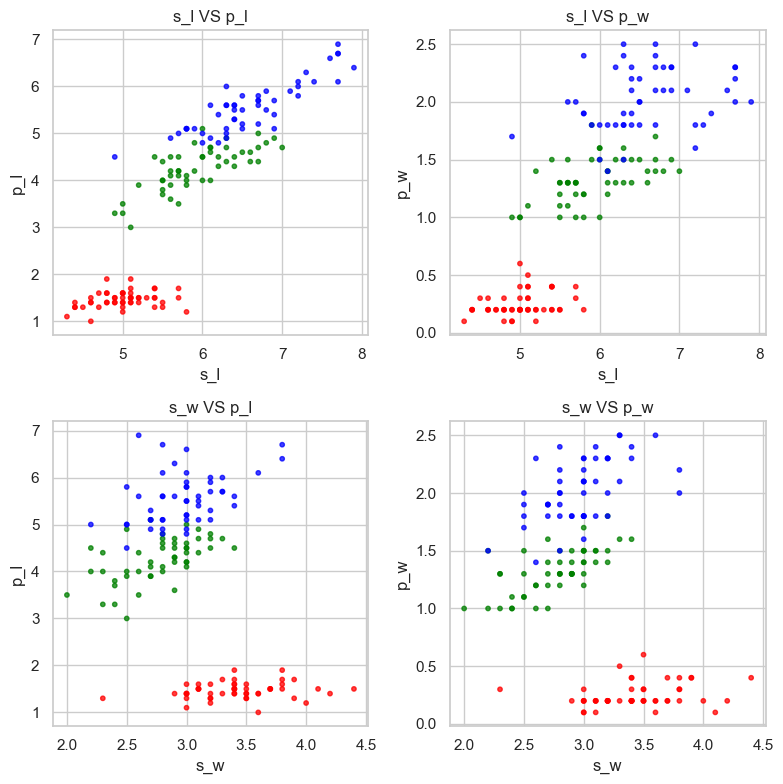

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

axs[0,0].scatter(data['sepal_length'], data['petal_length'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[0,0].set_title('s_l VS p_l')
axs[0,0].set_xlabel('s_l')
axs[0,0].set_ylabel('p_l')

axs[0,1].scatter(data['sepal_length'], data['petal_width'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[0,1].set_title('s_l VS p_w')
axs[0,1].set_xlabel('s_l')
axs[0,1].set_ylabel('p_w')

axs[1,0].scatter(data['sepal_width'], data['petal_length'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[1,0].set_title('s_w VS p_l')
axs[1,0].set_xlabel('s_w')
axs[1,0].set_ylabel('p_l')

axs[1,1].scatter(data['sepal_width'], data['petal_width'], 
            s = 10, color = data['species'].map(color_mapping), alpha = 0.75)
axs[1,1].set_title('s_w VS p_w')
axs[1,1].set_xlabel('s_w')
axs[1,1].set_ylabel('p_w')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

using seaborn

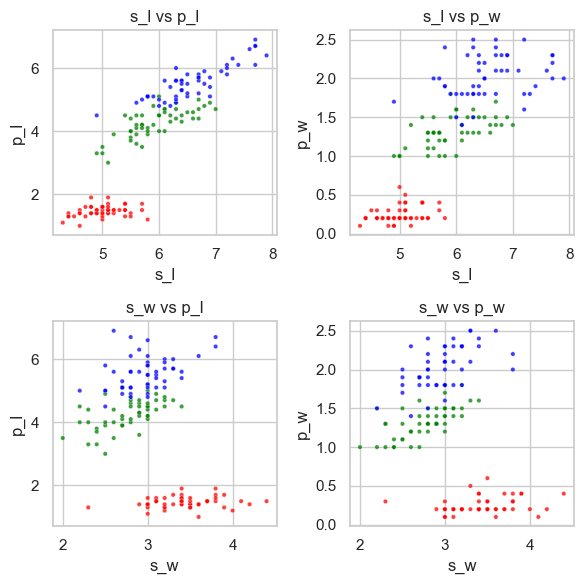

In [15]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(6, 6))

sns.scatterplot(x='sepal_length', y='petal_length', data=data, s=10, color = data['species'].map(color_mapping), alpha=0.75, ax=axs[0, 0])
axs[0, 0].set_xlabel('s_l')
axs[0, 0].set_ylabel('p_l')
axs[0, 0].set_title('s_l vs p_l')

sns.scatterplot(x='sepal_length', y='petal_width', data=data, s=10, color = data['species'].map(color_mapping), alpha=0.75, ax=axs[0, 1])
axs[0, 1].set_xlabel('s_l')
axs[0, 1].set_ylabel('p_w')
axs[0, 1].set_title('s_l vs p_w')

sns.scatterplot(x='sepal_width', y='petal_length', data=data, s=10, color = data['species'].map(color_mapping), alpha=0.75, ax=axs[1, 0])
axs[1, 0].set_xlabel('s_w')
axs[1, 0].set_ylabel('p_l')
axs[1, 0].set_title('s_w vs p_l')

sns.scatterplot(x='sepal_width', y='petal_width', data=data, s=10, color = data['species'].map(color_mapping), alpha=0.75, ax=axs[1, 1])
axs[1, 1].set_xlabel('s_w')
axs[1, 1].set_ylabel('p_w')
axs[1, 1].set_title('s_w vs p_w')

plt.tight_layout()

plt.show()

### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况

using matplotlib

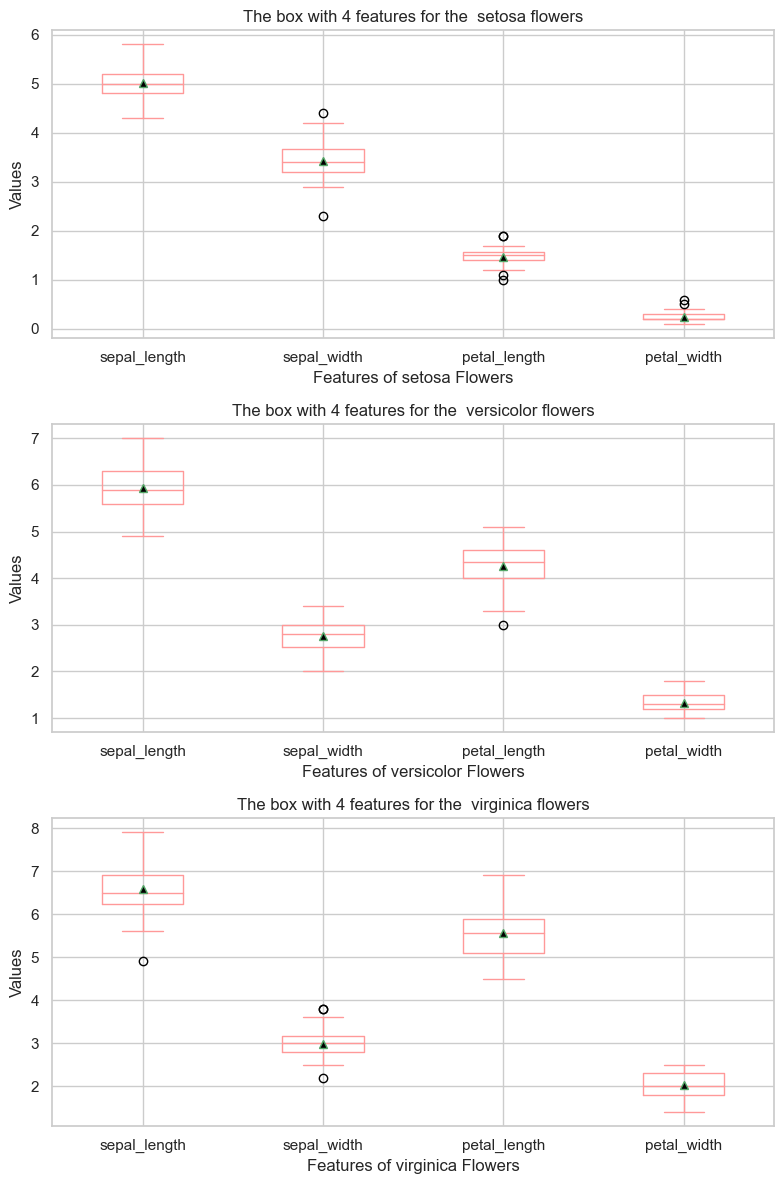

In [37]:
species_to_plot = list(data['species'].unique())

fig, axs = plt.subplots(len(species_to_plot), 1, figsize=(8, 12))

for i, species in enumerate(species_to_plot):
    species_data = data[data['species'] == species]
    species_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].boxplot(ax=axs[i], color='#FF9999', showmeans=True, meanprops=dict(markerfacecolor='black'))
    axs[i].set_title(f'The box with 4 features for the  {species} flowers')
    axs[i].set_xlabel(f'Features of {species} Flowers')
    axs[i].set_ylabel('Values')

plt.tight_layout()

plt.show()


using seaborn

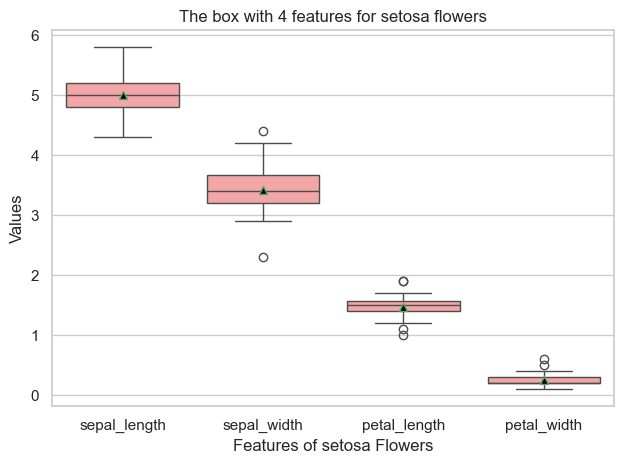

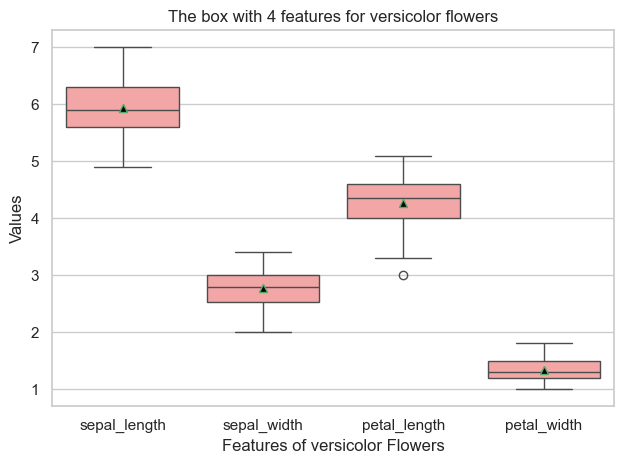

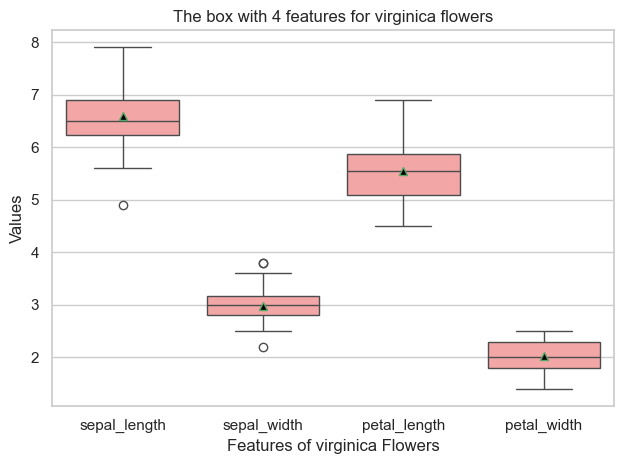

In [53]:
species_to_plot = list(data['species'].unique())

for species in species_to_plot:
    species_data = data[data['species'] == species]
    sns.boxplot(data=species_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], color='#FF9999', showmeans=True, meanprops=dict(markerfacecolor='black'))
    plt.title(f'The box with 4 features for {species} flowers')
    plt.xlabel(f'Features of {species} Flowers')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [54]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. 小费和总消费之间的关系

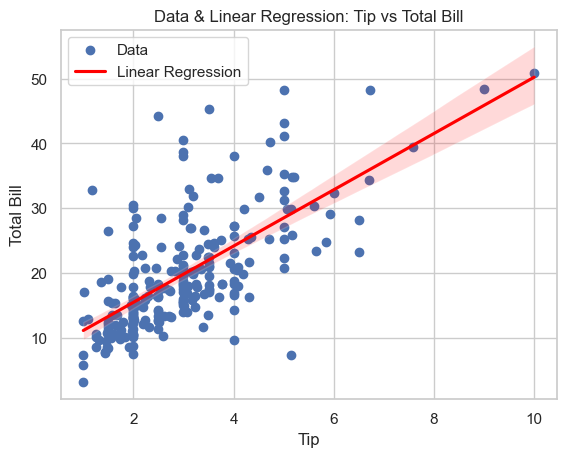

In [56]:
plt.scatter(data['tip'], data['total_bill'], label='Data')

# Fit and plot linear regression
sns.regplot(x='tip', y='total_bill', data=data, scatter=False, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.title('Data & Linear Regression: Tip vs Total Bill')

# Add legend
plt.legend()

# Show the plot
plt.show()


### 2-6. tips vs different features

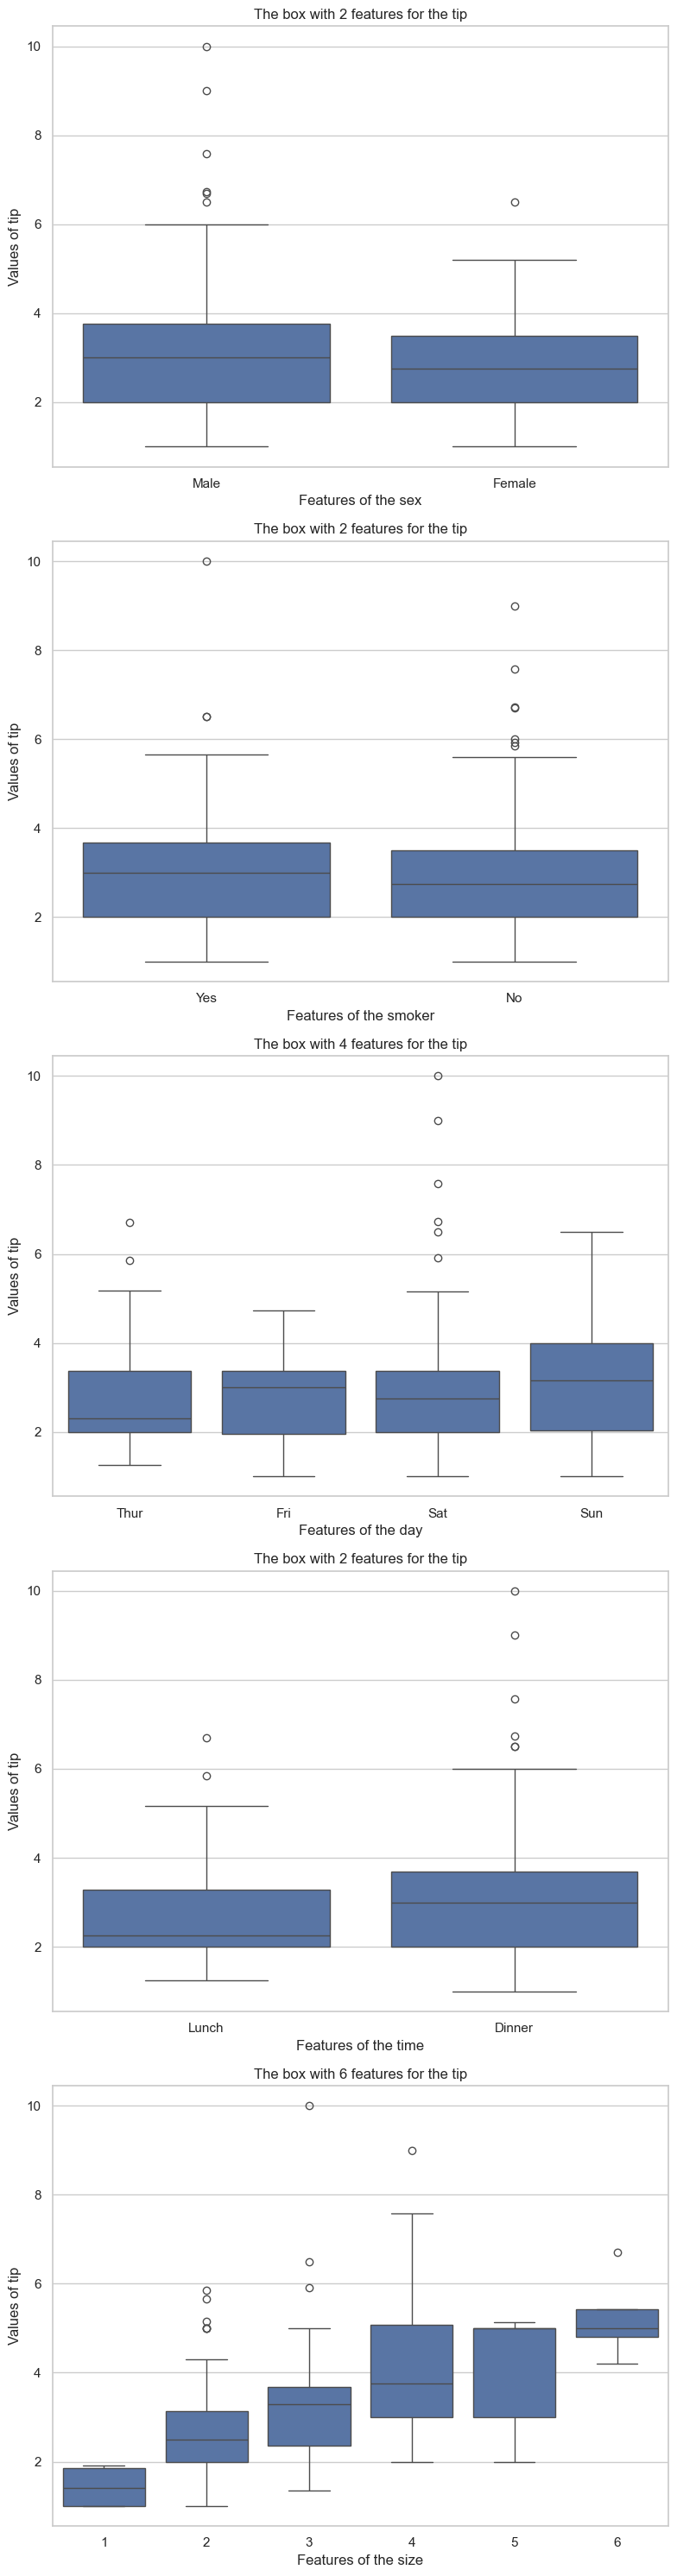

In [63]:
columns_to_plot = ['sex', 'smoker', 'day', 'time', 'size']

fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(8, 6 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=column, y='tip', data=data, ax=axs[i])
    axs[i].set_title(f'The box with {len(data[column].unique())} features for the tip')
    axs[i].set_xlabel(f'Features of the {column}')
    axs[i].set_ylabel('Values of tip')

plt.tight_layout()

plt.show()


### 7. 性别+抽烟的组合因素对慷慨度的影响

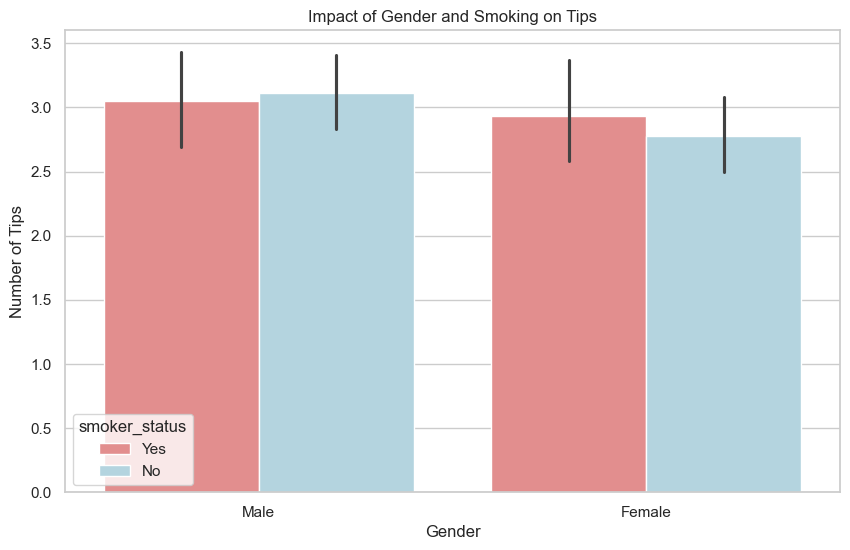

In [69]:
data['smoker_status'] = data['smoker'].apply(lambda x: 'No' if x == 'No' else 'Yes')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x='sex', y='tip', hue='smoker_status', data=data, palette={'No': 'lightblue', 'Yes': 'lightcoral'})

plt.xlabel('Gender')
plt.ylabel('Number of Tips')
plt.title('Impact of Gender and Smoking on Tips')

plt.show()


In [72]:
tip_totals = data.pivot_table(index='sex', columns='smoker_status', values='tip', aggfunc='mean', margins=False)
print(tip_totals)


smoker_status       Yes        No
sex                              
Male           3.051167  3.113402
Female         2.931515  2.773519


## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [84]:
data = sns.load_dataset("titanic")
data = data.dropna(subset=['age'])
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1. 不同仓位等级中幸存和遇难的乘客比例

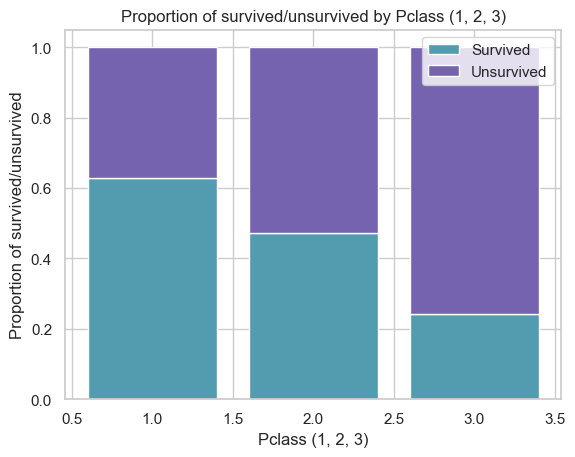

In [78]:
data_df = data.groupby("pclass")["survived"].agg(['sum', 'count'])
data_df['unsurvived'] = data_df['count'] - data_df['sum']
data_df['survived_prop'] = data_df['sum'] / data_df['count']
data_df['unsurvived_prop'] = data_df['unsurvived'] / data_df['count']

_, ax = plt.subplots()
ax.bar(data_df.index, data_df['survived_prop'], color='#539caf', label='Survived')
ax.bar(data_df.index, data_df['unsurvived_prop'], color='#7663b0', bottom=data_df['survived_prop'], label='Unsurvived')

ax.set_ylabel('Proportion of survived/unsurvived')
ax.set_xlabel('Pclass (1, 2, 3)')
ax.set_title('Proportion of survived/unsurvived by Pclass (1, 2, 3)')
ax.legend(loc='upper right')

plt.show()

### 2. 不同性别的幸存比例

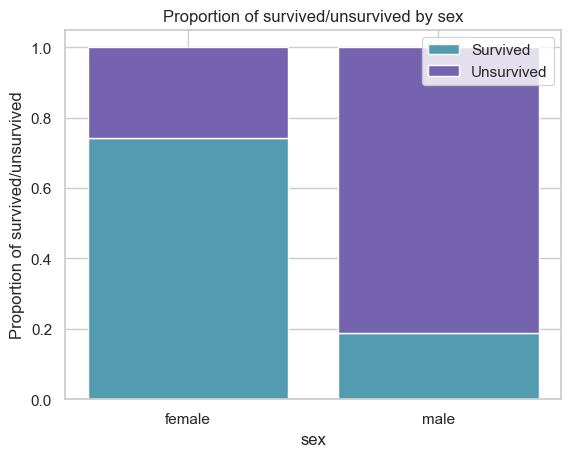

In [79]:
data_df = data.groupby("sex")["survived"].agg(['sum', 'count'])
data_df['unsurvived'] = data_df['count'] - data_df['sum']
data_df['survived_prop'] = data_df['sum'] / data_df['count']
data_df['unsurvived_prop'] = data_df['unsurvived'] / data_df['count']

_, ax = plt.subplots()
ax.bar(data_df.index, data_df['survived_prop'], color='#539caf', label='Survived')
ax.bar(data_df.index, data_df['unsurvived_prop'], color='#7663b0', bottom=data_df['survived_prop'], label='Unsurvived')

ax.set_ylabel('Proportion of survived/unsurvived')
ax.set_xlabel('sex')
ax.set_title('Proportion of survived/unsurvived by sex')
ax.legend(loc='upper right')

plt.show()

### 3,4,6,7. 幸存和遇难乘客的feature分布

In [81]:
def plot_survived_vs_feature(feature): 
    survived_values = [data.loc[data["survived"] == i, feature] for i in set(data["survived"])]
    
    plt.boxplot(survived_values, labels=set(data["survived"]), patch_artist=True, boxprops=dict(color='blue'))
    
    plt.xlabel("Survived")
    plt.ylabel(feature)
    plt.title(f"The box with 2 features for {feature}")
    plt.show()

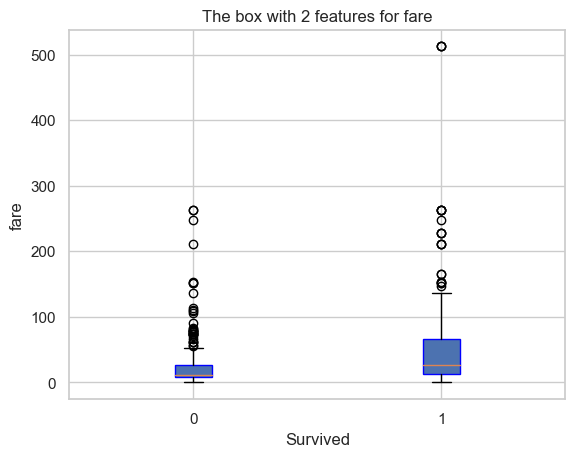

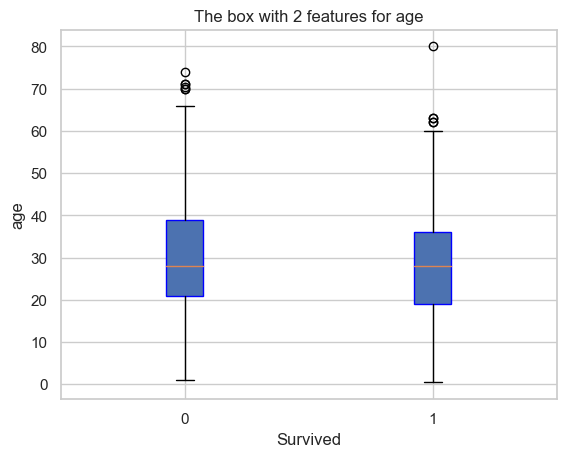

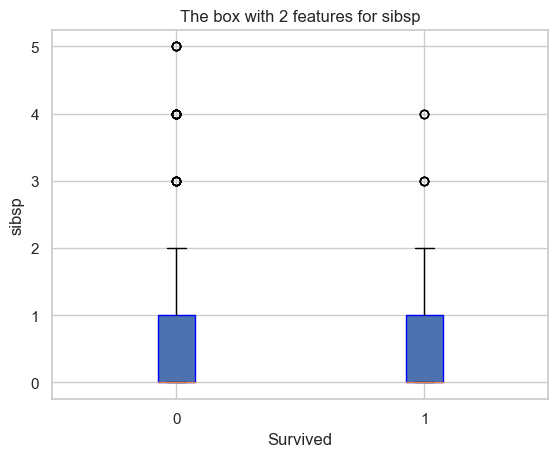

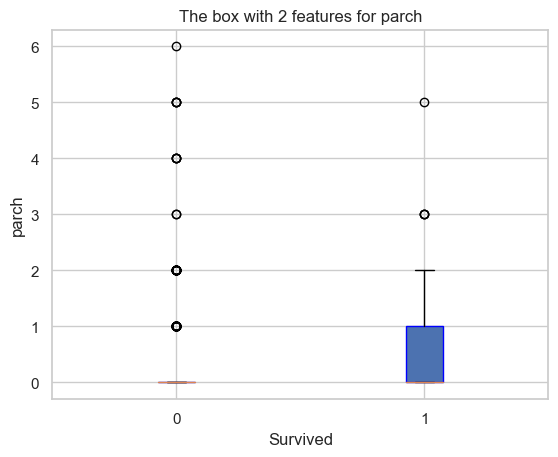

In [85]:
# 幸存和遇难乘客的票价分布
plot_survived_vs_feature("fare")

# 幸存和遇难乘客的年龄分布
plot_survived_vs_feature("age")

# 幸存和遇难乘客堂兄弟姐妹的数量分布
plot_survived_vs_feature("sibsp")

# 幸存和遇难乘客父母子女的数量分布
plot_survived_vs_feature("parch")


### 5. 不同上船港口的乘客仓位等级分布

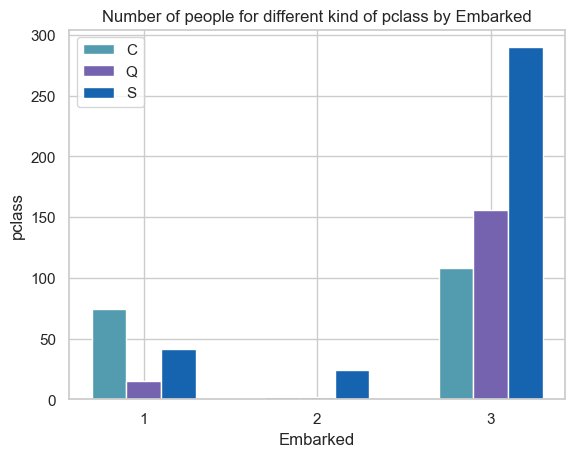

In [97]:
df1 = data[data["pclass"] == 1].groupby("embarked").count()["pclass"]
df2 = data[data["pclass"] == 2].groupby("embarked").count()["pclass"]
df3 = data[data["pclass"] == 3].groupby("embarked").count()["pclass"]

bar_width = 0.2

x_data1 = np.arange(len(sorted(list(data["pclass"].unique()))))
x_data2 = x_data1 + bar_width
x_data3 = x_data2 + bar_width

plt.bar(x_data1, df1, width=bar_width, color='#539caf', label='C')
plt.bar(x_data2, df2, width=bar_width, color='#7663b0', label='Q')
plt.bar(x_data3, df3, width=bar_width, color='#1663b0', label='S')

plt.xlabel('Embarked')
plt.ylabel('pclass')
plt.title('Number of people for different kind of pclass by Embarked')
plt.xticks(x_data1 + bar_width, sorted(list(data["pclass"].unique())))  # Set x-axis tick positions

plt.legend()

plt.show()

### 8. 单独乘船与否和幸存之间有没有联系

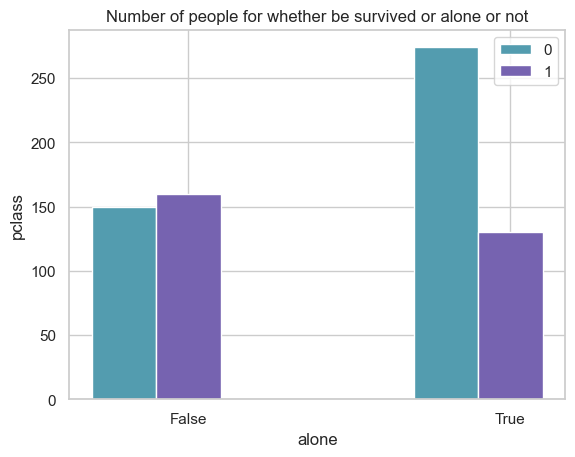

In [99]:
df1 = data[data["survived"] == 0].groupby("alone")["alone"].count()
df2 = data[data["survived"] == 1].groupby("alone")["alone"].count()
categories = ["False","True"]

bar_width = 0.2

x_data1 = np.arange(len(categories))
x_data2 = x_data1 + bar_width

plt.bar(x_data1, df1, width=bar_width, color='#539caf', label='0')
plt.bar(x_data2, df2, width=bar_width, color='#7663b0', label='1')
plt.xlabel('alone')
plt.ylabel('pclass')
plt.title('Number of people for whether be survived or alone or not')
plt.xticks(x_data1 + bar_width, categories)  # 设置横坐标刻度位置

plt.legend()

plt.show()
